Credit Card Fraud Detection

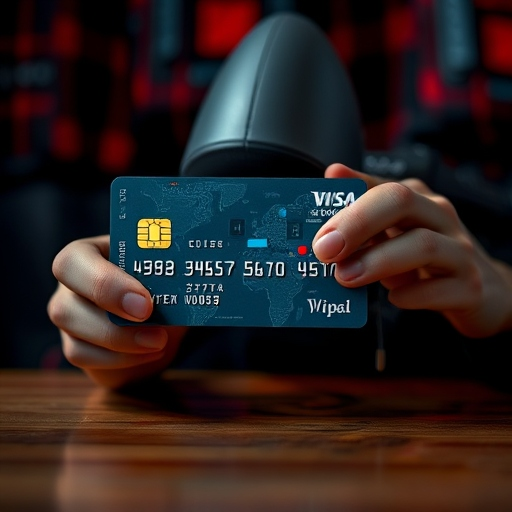

The task involves analyzing the Credit Card Fraud Detection dataset to identify fraudulent credit card transactions. The dataset contains transactions made by European cardholders over two days, with a total of 284,807 transactions, of which only 492 are fraudulent (approximately 0.17%). The primary goal is to create a model that can accurately classify whether a given transaction is fraudulent or legitimate. This is a binary classification problem where the target variable, labeled as "Class", indicates the transaction type: 1 for fraud and 0 for legitimate transactions.

The target variable, "Class", has two labels:

0: Legitimate transaction. 1: Fraudulent transaction. The dataset contains 30 features:

Input Features: 28 anonymized features (V1 to V28) from PCA. "Time" (elapsed seconds) and "Amount" (transaction value).

The task involves handling the dataset's severe imbalance to accurately classify fraud while minimizing false positives.

Link for Dataset : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, roc_auc_score, precision_recall_curve
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import f1_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import silhouette_score
from sklearn.metrics import make_scorer
from scipy.stats import uniform




In [7]:

# Load the dataset
dataset_path = "/Users/nirvikarajendra/Desktop/Data603/projects/creditcard2.csv"
df = pd.read_csv(dataset_path)

# Dataset overview
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Dataset Shape: (284807, 31)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20  

In [8]:
df.dropna()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


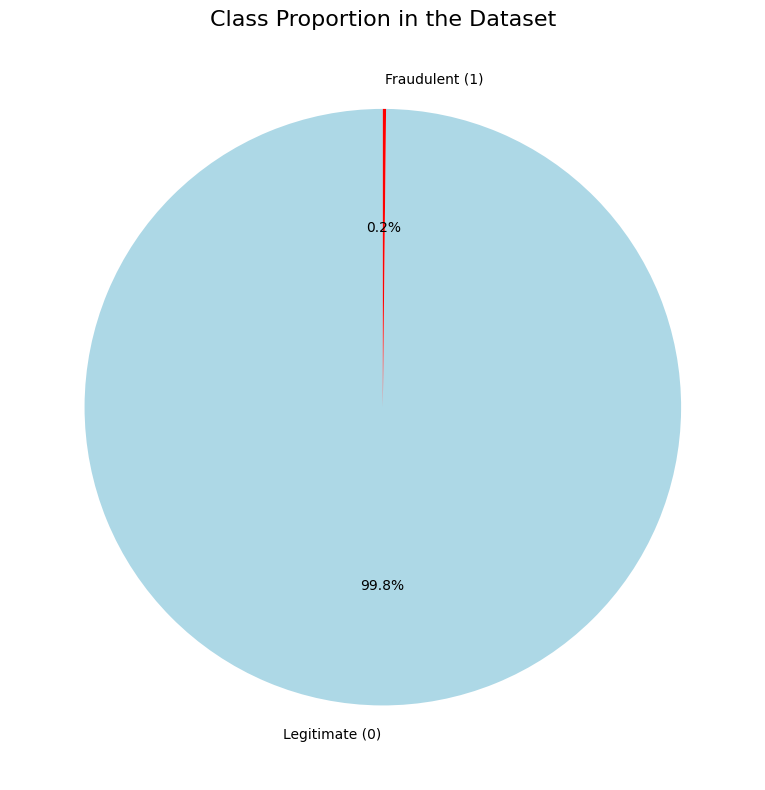

In [9]:
# Class Proportion Pie Chart
class_counts = df['Class'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=['Legitimate (0)', 'Fraudulent (1)'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'red'])
plt.title("Class Proportion in the Dataset", fontsize=16)
plt.tight_layout()
plt.show()


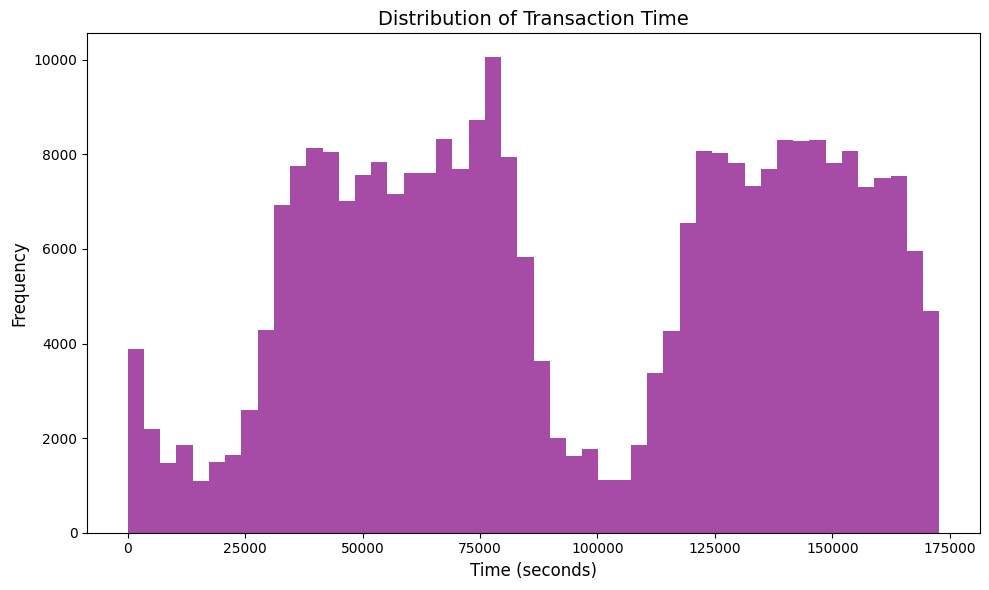

In [10]:
# Histogram of Time
plt.figure(figsize=(10, 6))
plt.hist(df['Time'], bins=50, color='purple', alpha=0.7)
plt.title("Distribution of Transaction Time", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()


/var/folders/54/g3cnthw135qbh7wtwcdgbjrc0000gn/T/ipykernel_5953/1807571909.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=df, palette=['blue', 'red'])


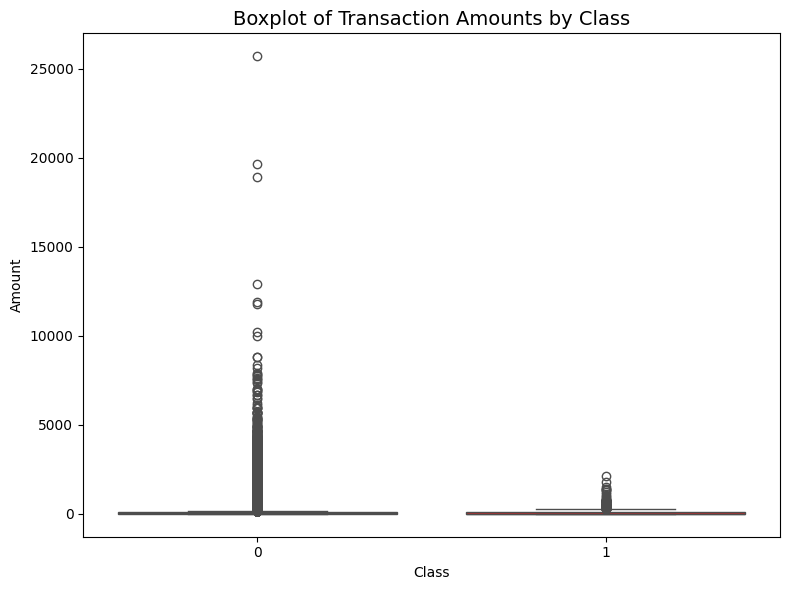

In [11]:
# Boxplot for Amount by Class
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=df, palette=['blue', 'red'])
plt.title("Boxplot of Transaction Amounts by Class", fontsize=14)
plt.tight_layout()
plt.show()


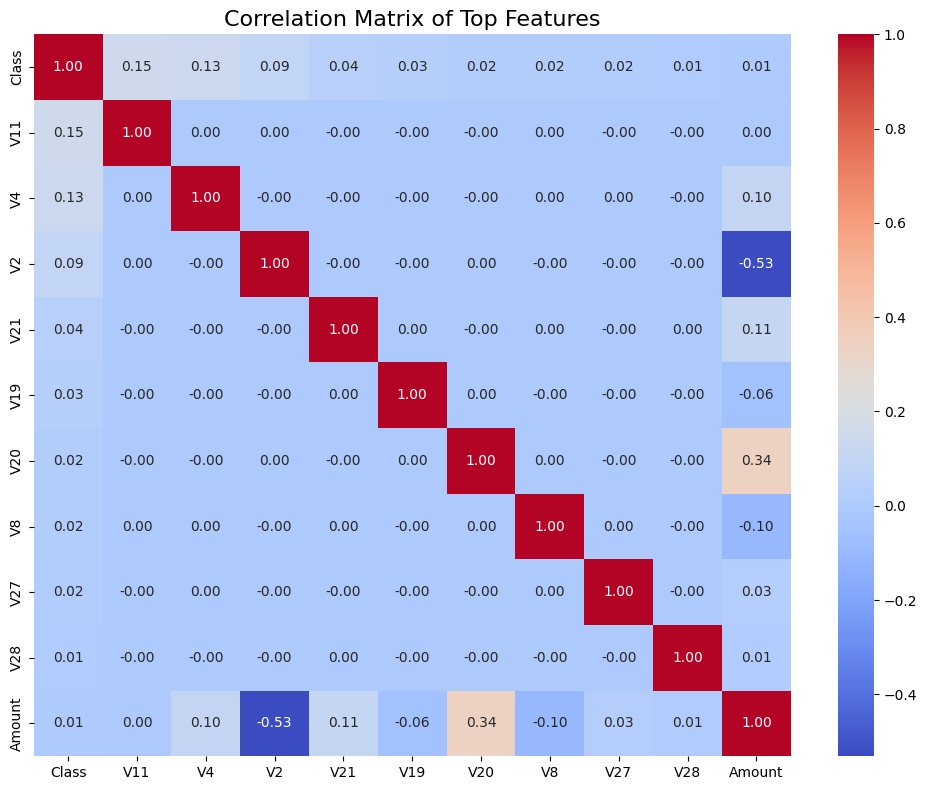

In [12]:
# Simplified Correlation Matrix for Top Features
# Calculate correlation with the 'Class' column
correlation_with_target = df.corr()['Class'].sort_values(ascending=False)

# Now you can use correlation_with_target
top_corr_features = correlation_with_target.index[:11]  # Top 10 features + Class
simplified_corr_matrix = df[top_corr_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(simplified_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Top Features", fontsize=16)
plt.tight_layout()
plt.show()

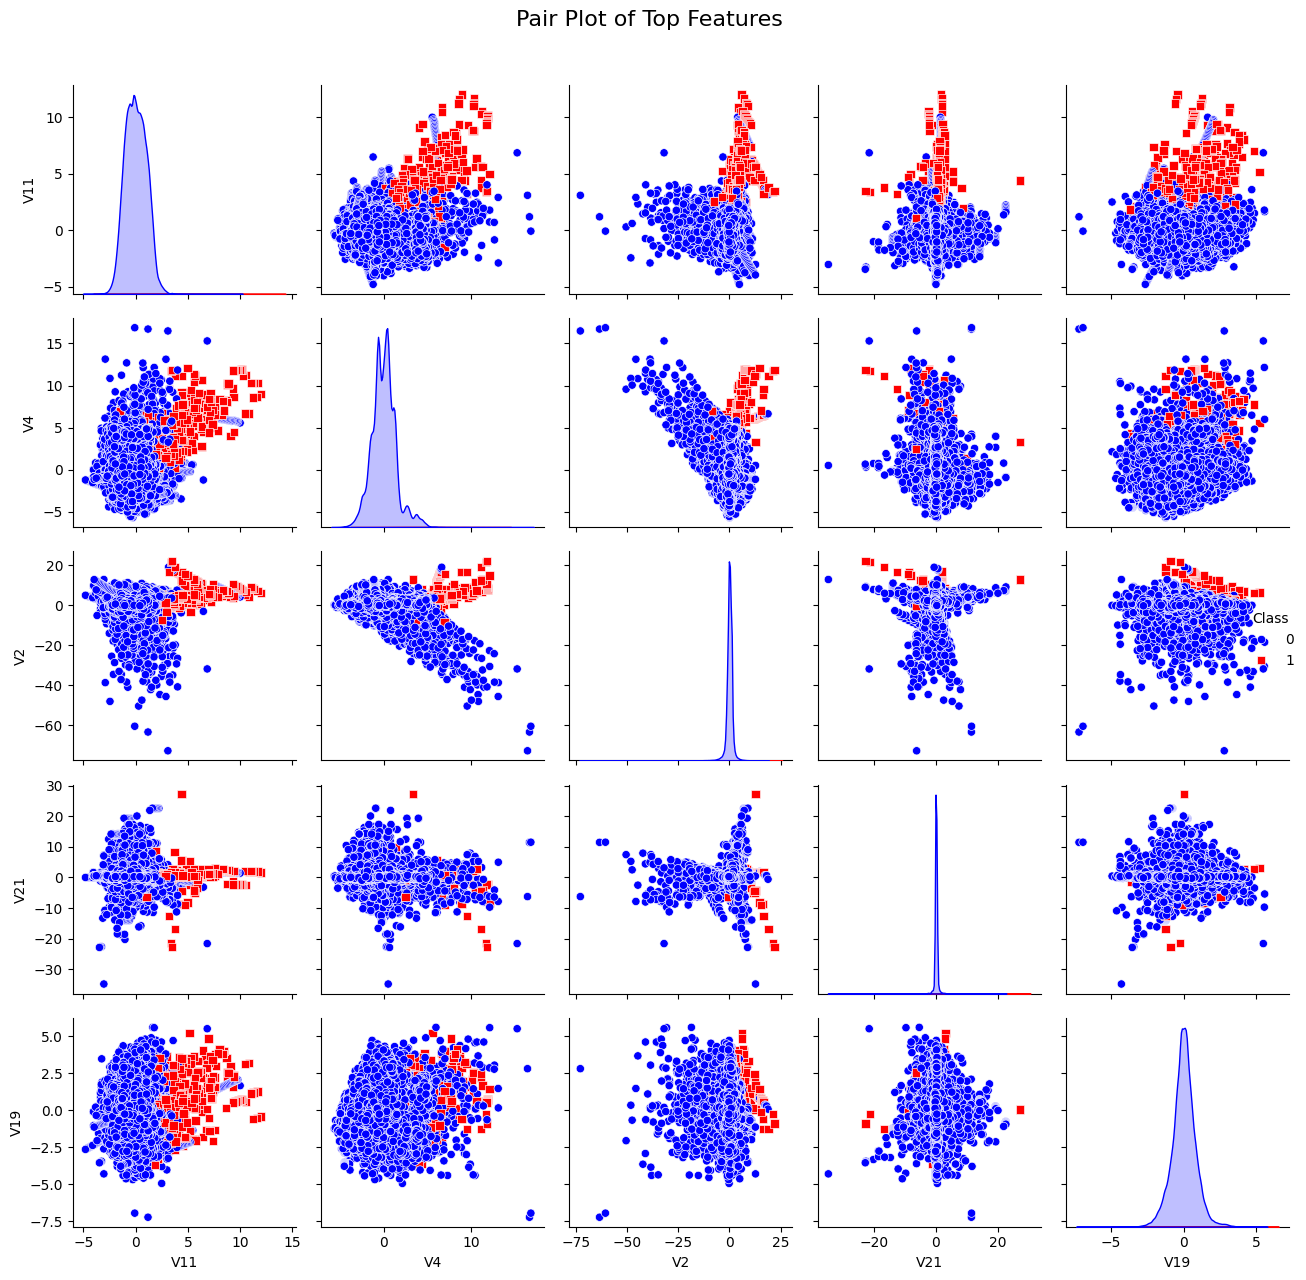

In [13]:
# Pair Plot for Top Features
top_features = ['V11', 'V4', 'V2', 'V21', 'V19', 'Class']
sns.pairplot(df[top_features], hue='Class', palette=['blue', 'red'], diag_kind='kde', markers=["o", "s"])
plt.suptitle("Pair Plot of Top Features", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


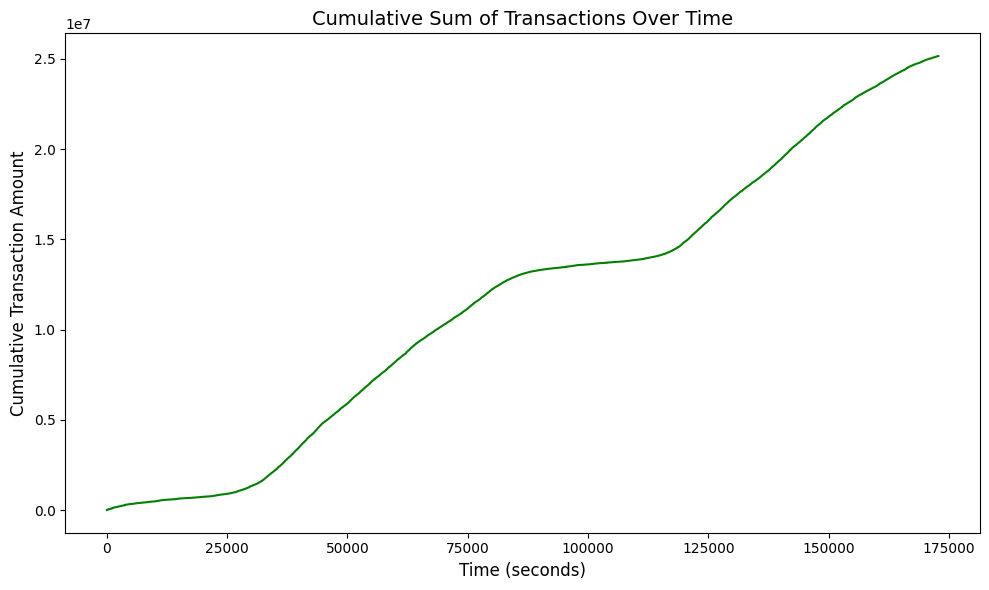

In [14]:
# Cumulative Sum of Transactions Over Time
df['Cumulative_Transactions'] = df['Amount'].cumsum()
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Cumulative_Transactions'], color='green')
plt.title("Cumulative Sum of Transactions Over Time", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("Cumulative Transaction Amount", fontsize=12)
plt.tight_layout()
plt.show()


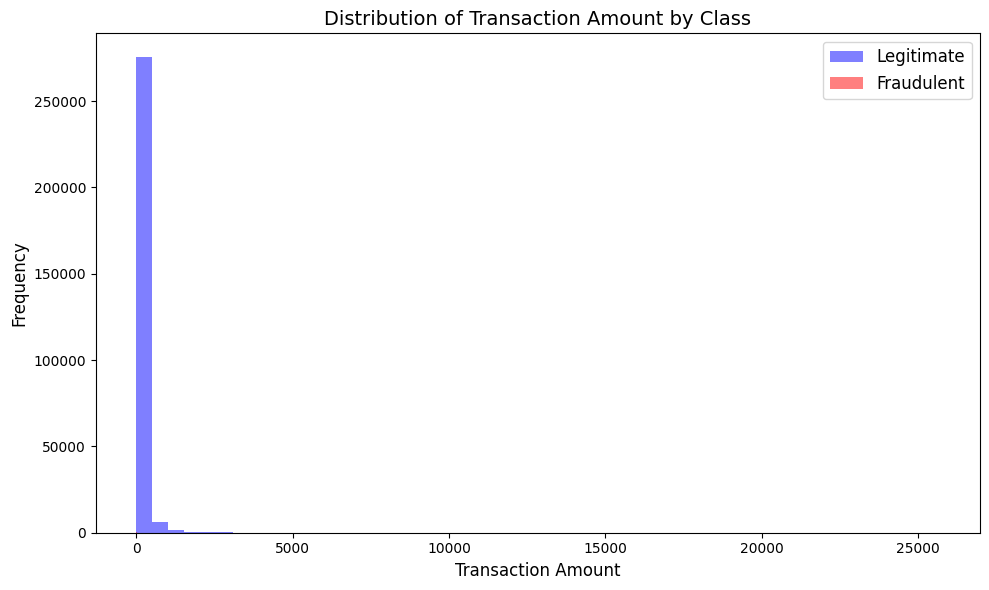

In [15]:
# Plot 1: Histogram of 'Amount' by Class
plt.figure(figsize=(10, 6))
plt.hist(df.loc[df['Class'] == 0, 'Amount'], bins=50, alpha=0.5, label='Legitimate', color='blue')
plt.hist(df.loc[df['Class'] == 1, 'Amount'], bins=50, alpha=0.5, label='Fraudulent', color='red')
plt.title("Distribution of Transaction Amount by Class", fontsize=14)
plt.xlabel("Transaction Amount", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


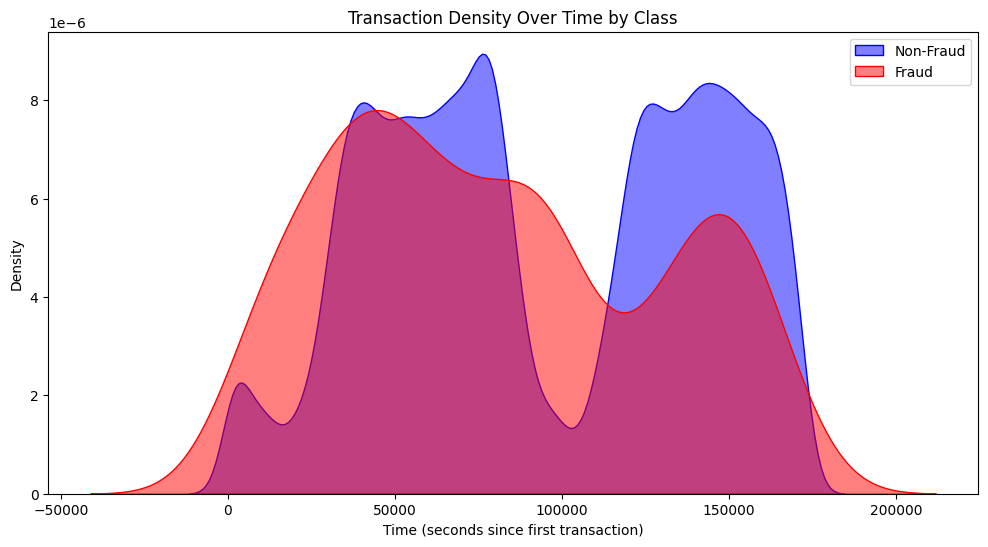

In [16]:
plt.figure(figsize=(12, 6))

# Density plot for legitimate transactions over time
sns.kdeplot(df[df['Class'] == 0]['Time'], label='Non-Fraud', color='blue', fill=True, alpha=0.5)

# Density plot for fraudulent transactions over time
sns.kdeplot(df[df['Class'] == 1]['Time'], label='Fraud', color='red', fill=True, alpha=0.5)

plt.title('Transaction Density Over Time by Class')
plt.xlabel('Time (seconds since first transaction)')
plt.ylabel('Density')
plt.legend()
plt.show()

/var/folders/54/g3cnthw135qbh7wtwcdgbjrc0000gn/T/ipykernel_5953/1453781772.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='V11', data=df, palette=['blue', 'red'])


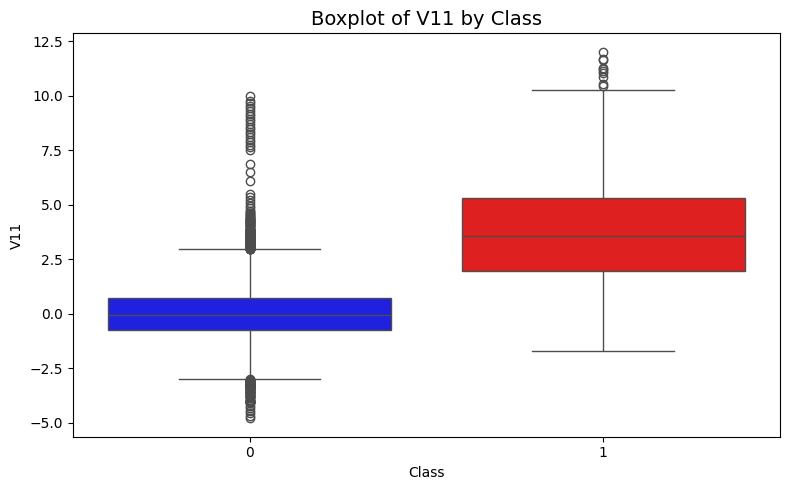

In [17]:
# Plot 2: Boxplot for V11 by Class
plt.figure(figsize=(8, 5))
sns.boxplot(x='Class', y='V11', data=df, palette=['blue', 'red'])
plt.title('Boxplot of V11 by Class', fontsize=14)
plt.tight_layout()
plt.show()


/var/folders/54/g3cnthw135qbh7wtwcdgbjrc0000gn/T/ipykernel_5953/338396881.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='V4', data=df, palette=['blue', 'red'])


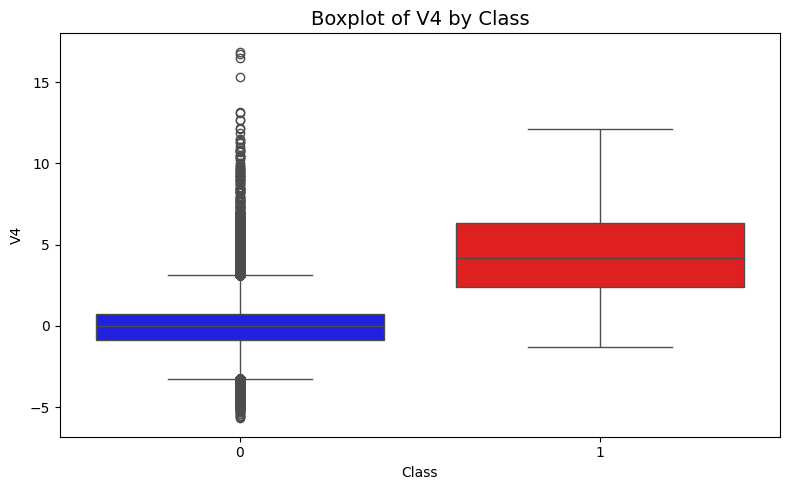

In [18]:
# Plot 1: Boxplot for V4 by Class
plt.figure(figsize=(8, 5))
sns.boxplot(x='Class', y='V4', data=df, palette=['blue', 'red'])
plt.title('Boxplot of V4 by Class', fontsize=14)
plt.tight_layout()
plt.show()


In [19]:
!pip install -q imbalanced-learn



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [20]:
# Split features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Feature Scaling for 'Amount' and 'Time'
scaler = MinMaxScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

In [21]:

# Assuming X and y are already defined
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Count the instances of each class
resampled_distribution = Counter(y_resampled)

# Print the distribution of classes
print("Class distribution after applying SMOTE:")
for class_label, count in resampled_distribution.items():
    print(f"Class {class_label}: {count}")


Class distribution after applying SMOTE:
Class 0: 284315
Class 1: 284315


In [22]:
# Correlation-based feature selection
correlation = df.corr()['Class'].sort_values(ascending=False)
selected_features = correlation[abs(correlation) > 0.1].index  # Threshold of 0.1 for high correlation
# Remove 'Class' from selected_features as it is the target variable
selected_features = selected_features.drop('Class')

# Filter resampled data to include only selected features
X_resampled = X_resampled[selected_features]

In [23]:
# Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)


In [24]:
# List the feature columns
feature_columns = X_train.columns
print("Feature Columns Used for Training:")
print(feature_columns)


Feature Columns Used for Training:
Index(['V11', 'V4', 'V1', 'V18', 'V7', 'V3', 'V16', 'V10', 'V12', 'V14',
       'V17'],
      dtype='object')



# **Logistic** **regression**

In [25]:
# Feature 1: Simulate transaction count and average transaction amount per hour
df['hour'] = (df['Time'] // 3600).astype(int)

# Transaction count per hour
transaction_count = df.groupby('hour')['Amount'].count().reset_index(name='transaction_count')
df = df.merge(transaction_count, on='hour', how='left')

# Average transaction amount per hour
average_amount = df.groupby('hour')['Amount'].mean().reset_index(name='avg_transaction_amount')
df = df.merge(average_amount, on='hour', how='left')

# Feature 2: Standard deviation and z-score of transaction amounts
df['std_dev_amount'] = df['Amount'].rolling(window=10).std().fillna(0)
df['z_score_amount'] = zscore(df['Amount'])

# Feature 3: Interaction features
df['transaction_speed'] = df['transaction_count'] / (df['hour'] + 1)
df['amount_time_ratio'] = df['Amount'] / (df['Time'] + 1)

# Feature 4: Temporal features
df['transaction_hour'] = df['Time'] % 86400 // 3600
df['is_night'] = df['transaction_hour'].apply(lambda x: 1 if x < 6 or x > 22 else 0)

# Display the dataset with new features
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Cumulative_Transactions,hour,transaction_count,avg_transaction_amount,std_dev_amount,z_score_amount,transaction_speed,amount_time_ratio,transaction_hour,is_night
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,149.62,0,3963,64.875566,0.0,0.244964,3963.0,149.62,0.0,1
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,152.31,0,3963,64.875566,0.0,-0.342475,3963.0,2.69,0.0,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,530.97,0,3963,64.875566,0.0,1.160686,3963.0,189.33,0.0,1
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,654.47,0,3963,64.875566,0.0,0.140534,3963.0,61.75,0.0,1
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,724.46,0,3963,64.875566,0.0,-0.073403,3963.0,23.33,0.0,1


In [26]:

# Initialize Logistic Regression with class weights
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000)
log_reg.fit(X_resampled, y_resampled)

# Predict on test data
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     85295
           1       0.99      0.96      0.98     85294

    accuracy                           0.98    170589
   macro avg       0.98      0.98      0.98    170589
weighted avg       0.98      0.98      0.98    170589


Confusion Matrix:
[[84440   855]
 [ 3222 82072]]


In [27]:
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

# Grid Search with cross-validation
grid_search = GridSearchCV(LogisticRegression(class_weight='balanced', max_iter=1000), param_grid, cv=5, scoring='f1', verbose=1)
grid_search.fit(X_resampled, y_resampled)

# Best parameters
print("Best Parameters from Grid Search:", grid_search.best_params_)

# Evaluate on test data
y_pred_grid = grid_search.best_estimator_.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_grid))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters from Grid Search: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     85295
           1       0.99      0.96      0.98     85294

    accuracy                           0.98    170589
   macro avg       0.98      0.98      0.98    170589
weighted avg       0.98      0.98      0.98    170589



In [28]:

# Define parameter distributions
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}
# Random Search with cross-validation

random_search = RandomizedSearchCV(LogisticRegression(class_weight='balanced', max_iter=1000), param_grid, n_iter=20, cv=5, scoring='f1', random_state=42, verbose=1)
random_search.fit(X_resampled, y_resampled)

# Best parameters
print("Best Parameters from Random Search:", random_search.best_params_)

# Evaluate on test data
y_pred_random = random_search.best_estimator_.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_random))


Fitting 5 folds for each of 4 candidates, totalling 20 fits


/Users/nirvikarajendra/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters from Random Search: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 1}

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     85295
           1       0.99      0.96      0.98     85294

    accuracy                           0.98    170589
   macro avg       0.98      0.98      0.98    170589
weighted avg       0.98      0.98      0.98    170589



In [29]:
# Manual tuning
log_reg_tuned = LogisticRegression(class_weight='balanced', C=0.5, solver='liblinear', penalty='l1', max_iter=1000)
log_reg_tuned.fit(X_resampled, y_resampled)

# Evaluate the tuned model
y_pred_manual = log_reg_tuned.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_manual))



Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     85295
           1       0.99      0.96      0.98     85294

    accuracy                           0.98    170589
   macro avg       0.98      0.98      0.98    170589
weighted avg       0.98      0.98      0.98    170589



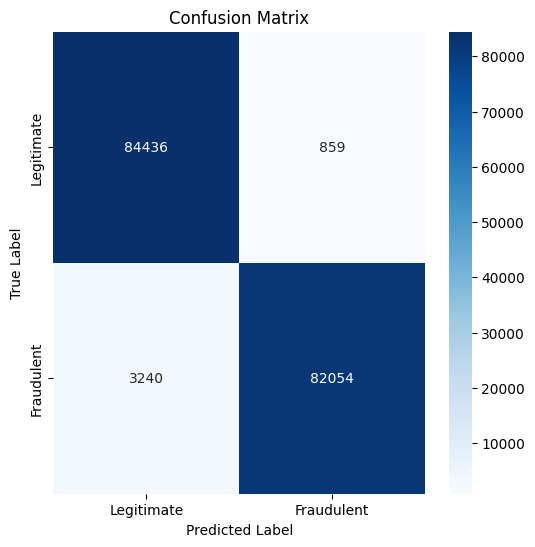

In [30]:
conf_matrix = confusion_matrix(y_test, y_pred_manual)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

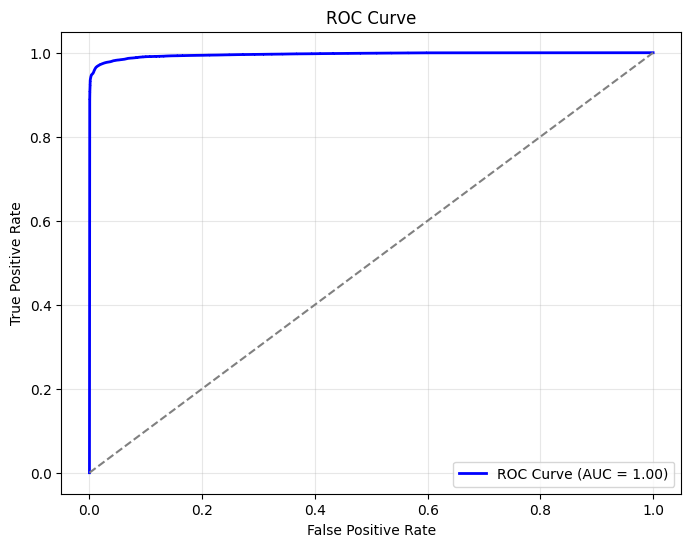

In [31]:
# Compute ROC curve
y_proba = log_reg_tuned.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

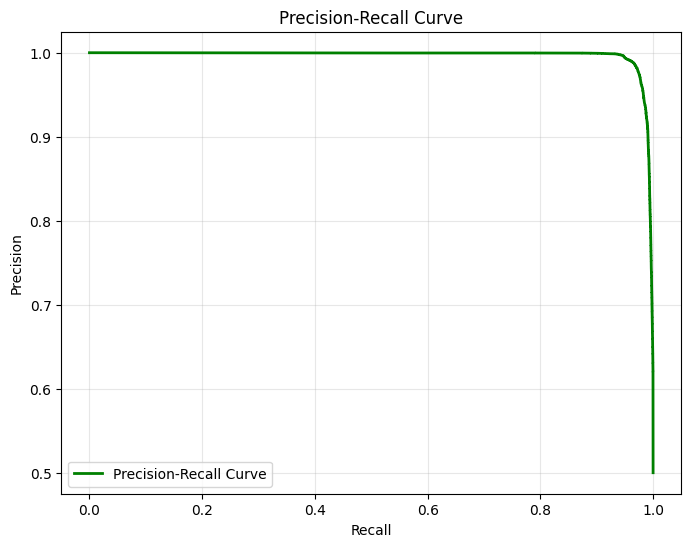

In [32]:
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color="green", lw=2, label="Precision-Recall Curve")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.show()

In [33]:

# Define custom class weights
class_weights = {0: 1, 1: 5}  # Assign higher weight to the minority class

# Initialize and train Logistic Regression with custom class weights
log_reg = LogisticRegression(class_weight=class_weights, max_iter=1000)
log_reg.fit(X_resampled, y_resampled)

# Predict on the test data
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     85295
           1       0.96      0.98      0.97     85294

    accuracy                           0.97    170589
   macro avg       0.97      0.97      0.97    170589
weighted avg       0.97      0.97      0.97    170589


Confusion Matrix:
[[82058  3237]
 [ 1687 83607]]


# **DBSCAN**

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

eps = 0.2  # Maximum distance between samples in a cluster
min_samples = 3  # Minimum number of samples in a cluster

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Convert DBSCAN labels to binary (1 = fraud, 0 = legitimate)
# DBSCAN assigns -1 to anomalies, so use that as fraud
dbscan_pred = (dbscan_labels == -1).astype(int)

# Evaluation
print("\nDBSCAN Results:")
print(classification_report(y, dbscan_pred, target_names=["Legitimate", "Fraudulent"]))



DBSCAN Results:
              precision    recall  f1-score   support

  Legitimate       1.00      0.10      0.18    284315
  Fraudulent       0.00      0.98      0.00       492

    accuracy                           0.10    284807
   macro avg       0.50      0.54      0.09    284807
weighted avg       1.00      0.10      0.18    284807



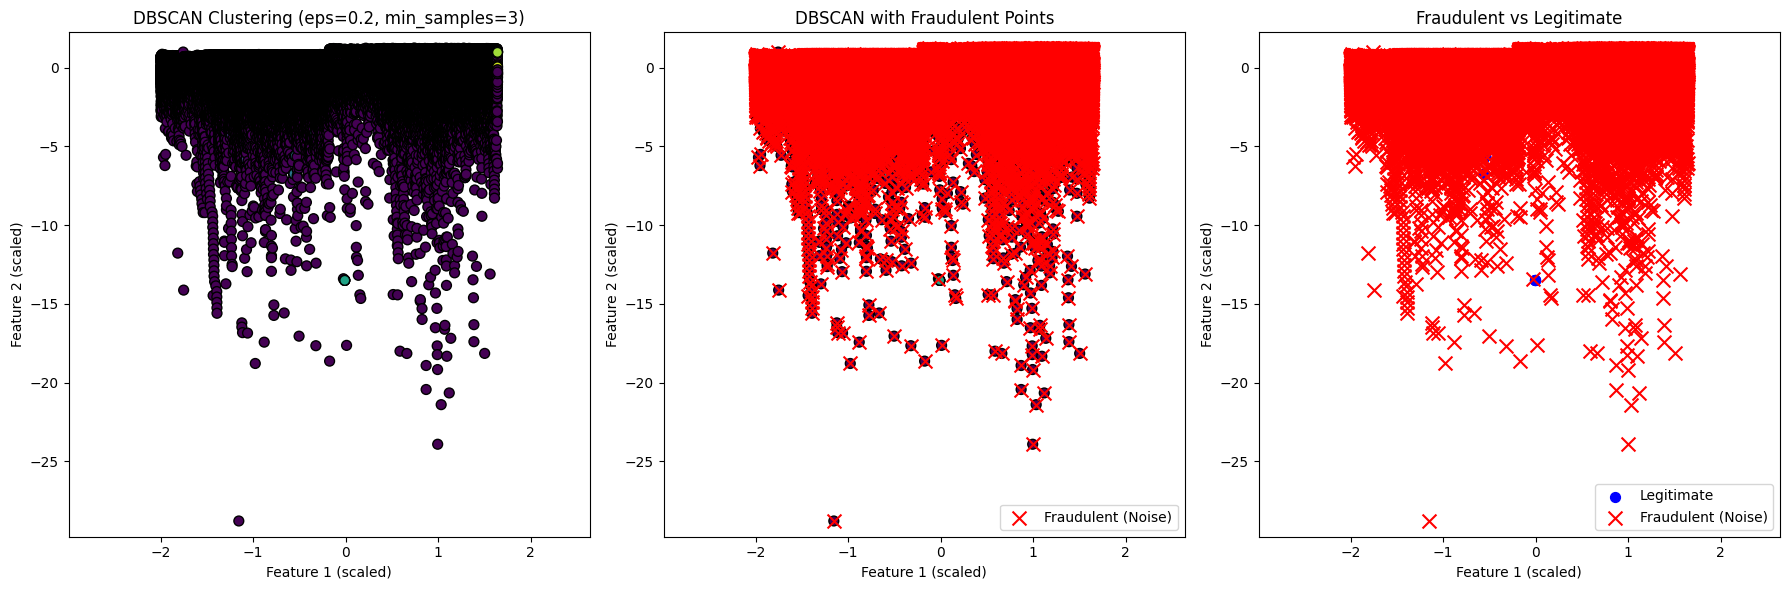

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Scatter plot of DBSCAN clusters (using colors for different clusters)
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
axes[0].set_title(f'DBSCAN Clustering (eps={eps}, min_samples={min_samples})')
axes[0].set_xlabel('Feature 1 (scaled)')
axes[0].set_ylabel('Feature 2 (scaled)')
axes[0].set_xlim(X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1)
axes[0].set_ylim(X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1)

# Plot 2: Highlight the outliers (fraudulent points in red)
axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis', marker='o', edgecolor='k', s=50)
axes[1].scatter(X_scaled[dbscan_labels == -1, 0], X_scaled[dbscan_labels == -1, 1],
                color='red', label='Fraudulent (Noise)', marker='x', s=100)  # Mark noise points
axes[1].set_title(f'DBSCAN with Fraudulent Points')
axes[1].set_xlabel('Feature 1 (scaled)')
axes[1].set_ylabel('Feature 2 (scaled)')
axes[1].legend()
axes[1].set_xlim(X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1)
axes[1].set_ylim(X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1)

# Plot 3: Showing only fraudulent (outliers) as red and legitimate points as blue
axes[2].scatter(X_scaled[dbscan_labels != -1, 0], X_scaled[dbscan_labels != -1, 1],
                color='blue', label='Legitimate', marker='o', s=50)  # Non-noise points
axes[2].scatter(X_scaled[dbscan_labels == -1, 0], X_scaled[dbscan_labels == -1, 1],
                color='red', label='Fraudulent (Noise)', marker='x', s=100)  # Noise points
axes[2].set_title(f'Fraudulent vs Legitimate')
axes[2].set_xlabel('Feature 1 (scaled)')
axes[2].set_ylabel('Feature 2 (scaled)')
axes[2].legend()
axes[2].set_xlim(X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1)
axes[2].set_ylim(X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1)

# Show the plots
plt.tight_layout()
plt.show()


Confusion Matrix:
[[ 28903 255412]
 [    10    482]]


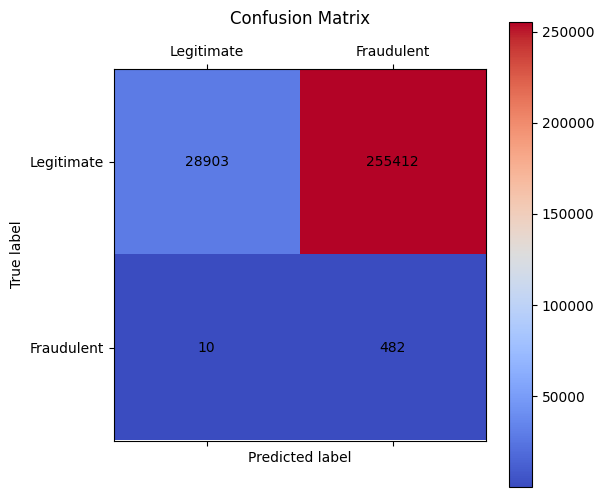

In [36]:
cm = confusion_matrix(y, dbscan_pred)
print("\nConfusion Matrix:")
print(cm)

# Confusion Matrix Plot
plt.figure(figsize=(6, 6))
plt.matshow(cm, cmap="coolwarm", fignum=1)
plt.title("Confusion Matrix", pad=15)
plt.colorbar()
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.xticks([0, 1], ["Legitimate", "Fraudulent"])
plt.yticks([0, 1], ["Legitimate", "Fraudulent"])
for (i, j), value in np.ndenumerate(cm):
    plt.text(j, i, value, ha="center", va="center", color="black")
plt.show()

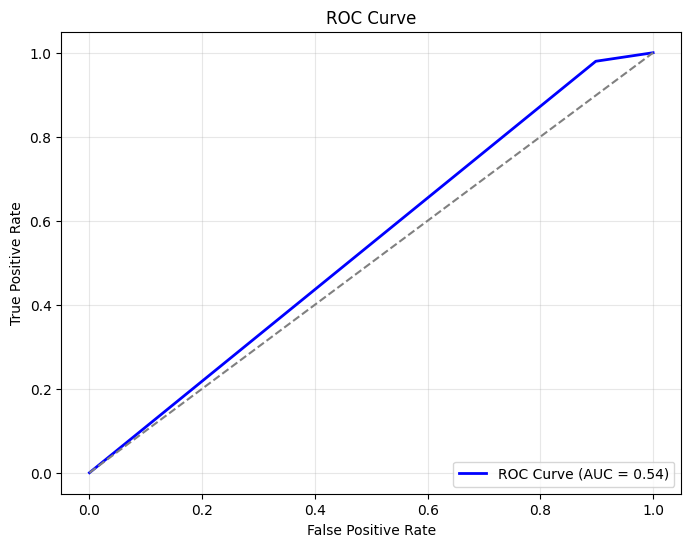

In [37]:
# Compute ROC Curve
fpr, tpr, _ = roc_curve(y, dbscan_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# **Isolation** **Forest**

In [38]:
iso_forest = IsolationForest(contamination=0.0017, random_state=42, n_estimators=100)
iso_forest.fit(X_scaled)

# Predict anomalies (-1 = anomaly, 1 = normal)
iso_pred = iso_forest.predict(X_scaled)
iso_pred = (iso_pred == -1).astype(int)  # Convert to binary: 1 = fraud, 0 = legitimate

# Evaluation
print("\nIsolation Forest Results:")
print(classification_report(y, iso_pred, target_names=["Legitimate", "Fraudulent"]))
print("\nConfusion Matrix:")
print(confusion_matrix(y, iso_pred))



Isolation Forest Results:
              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00    284315
  Fraudulent       0.27      0.26      0.26       492

    accuracy                           1.00    284807
   macro avg       0.63      0.63      0.63    284807
weighted avg       1.00      1.00      1.00    284807


Confusion Matrix:
[[283959    356]
 [   363    129]]


In [39]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

iso_forest_pca = IsolationForest(contamination=0.005, random_state=42, n_estimators=150)
iso_forest_pca.fit(X_pca)

# Predict anomalies
iso_pred_pca = iso_forest_pca.predict(X_pca)
iso_pred_pca = (iso_pred_pca == -1).astype(int)

# Evaluate
print("\nIsolation Forest with PCA Results:")
print(classification_report(y, iso_pred_pca, target_names=["Legitimate", "Fraudulent"]))
print("\nConfusion Matrix:")
print(confusion_matrix(y, iso_pred_pca))



Isolation Forest with PCA Results:
              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00    284315
  Fraudulent       0.11      0.32      0.16       492

    accuracy                           0.99    284807
   macro avg       0.55      0.66      0.58    284807
weighted avg       1.00      0.99      1.00    284807


Confusion Matrix:
[[283046   1269]
 [   336    156]]


After applying PCA, the Isolation Forest model's performance in detecting fraudulent transactions decreased. While the recall for fraudulent transactions improved slightly, the precision dropped significantly, indicating that PCA caused a loss of important features, leading to more false positives and reduced effectiveness in fraud detection.


In [40]:
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Step 1: Increase Contamination Rate
adjusted_contamination = 0.1  # Increase contamination to 10%

# Train Isolation Forest with updated contamination
iso_forest = IsolationForest(
    contamination=adjusted_contamination,
    random_state=42,
    n_estimators=200,
    max_samples='auto',
    max_features=0.8,
    bootstrap=False
)
iso_forest.fit(X_resampled_scaled)

# Get anomaly scores
anomaly_scores = iso_forest.decision_function(X_resampled_scaled)

# Step 2: Adjust Threshold
threshold = -0.1  # Example: Customize this based on anomaly scores' distribution
iso_pred_adjusted = (anomaly_scores < threshold).astype(int)

# Evaluate the model with adjusted threshold
print("\nClassification Report (Adjusted Threshold):")
print(classification_report(y_resampled, iso_pred_adjusted, target_names=["Legitimate", "Fraudulent"]))

print("\nConfusion Matrix (Adjusted Threshold):")
print(confusion_matrix(y_resampled, iso_pred_adjusted))

# Step 3: Ensemble Approach
# Add Isolation Forest predictions as a feature
X_resampled_with_if = pd.DataFrame(X_resampled_scaled)
X_resampled_with_if['iso_pred'] = iso_pred_adjusted

# Convert all column names to strings
X_resampled_with_if.columns = X_resampled_with_if.columns.astype(str)

# Split the data for supervised learning
X_train, X_test, y_train, y_test = train_test_split(X_resampled_with_if, y_resampled, test_size=0.2, random_state=42)

# Train a Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Evaluate Logistic Regression
y_pred_lr = log_reg.predict(X_test)
print("\nLogistic Regression with Isolation Forest Feature:")
print(classification_report(y_test, y_pred_lr, target_names=["Legitimate", "Fraudulent"]))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))



Classification Report (Adjusted Threshold):
              precision    recall  f1-score   support

  Legitimate       0.50      1.00      0.67    284315
  Fraudulent       0.99      0.02      0.03    284315

    accuracy                           0.51    568630
   macro avg       0.75      0.51      0.35    568630
weighted avg       0.75      0.51      0.35    568630


Confusion Matrix (Adjusted Threshold):
[[284292     23]
 [279850   4465]]

Logistic Regression with Isolation Forest Feature:
              precision    recall  f1-score   support

  Legitimate       0.96      0.99      0.98     56750
  Fraudulent       0.99      0.96      0.98     56976

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726


Confusion Matrix:
[[56150   600]
 [ 2123 54853]]


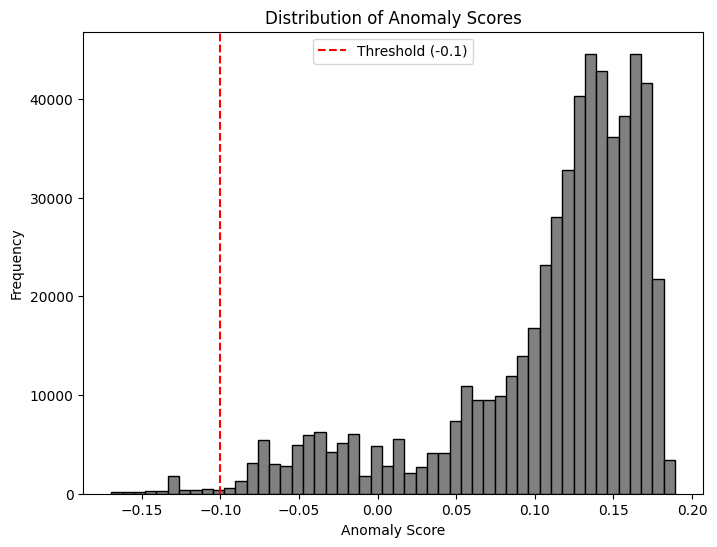

In [41]:
# Plot the anomaly scores
plt.figure(figsize=(8, 6))
plt.hist(anomaly_scores, bins=50, color='gray', edgecolor='black')
plt.axvline(x=threshold, color='red', linestyle='--', label=f"Threshold ({threshold})")
plt.title("Distribution of Anomaly Scores")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()



Confusion Matrix:


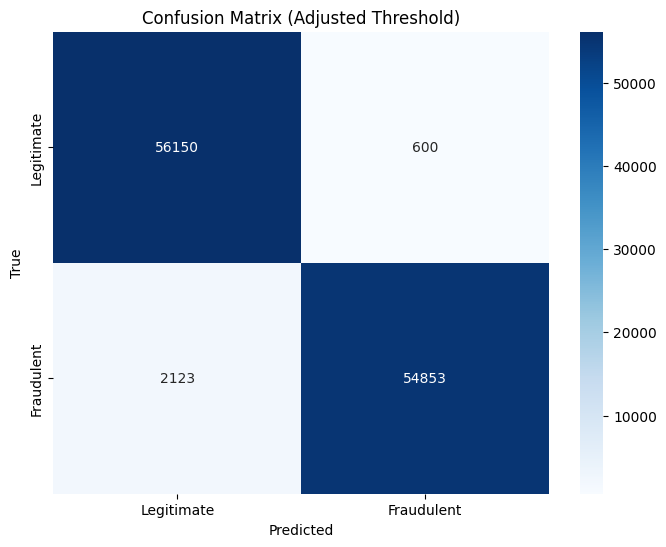

In [42]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
print("\nConfusion Matrix:")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Legitimate", "Fraudulent"], yticklabels=["Legitimate", "Fraudulent"])
plt.title("Confusion Matrix (Adjusted Threshold)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


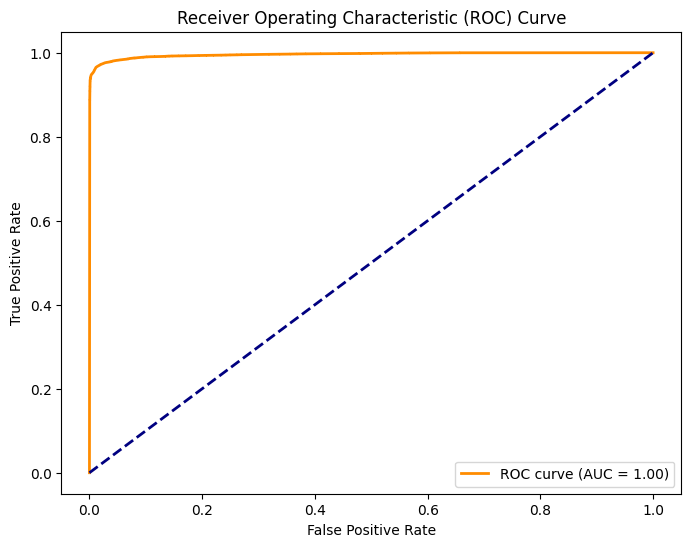

In [43]:
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]  # Probability of the positive class (fraudulent)

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [44]:
from joblib import dump
dump(log_reg, 'Logistic_regression_with_isoforest.joblib')

['Logistic_regression_with_isoforest.joblib']

In [45]:
pip install gradio



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [46]:
import gradio as gr
from joblib import load
def load_model(model_name):
    model_path = f"Logistic_regression_with_isoforest.joblib"
    return load(model_path)

In [47]:
# List the feature columns
feature_columns = X_train.columns
print("Feature Columns Used for Training:")
print(feature_columns)


Feature Columns Used for Training:
Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'iso_pred'], dtype='object')


In [48]:
# Check the target variable
print("Target Variable Used:")
print(y_train.name)  # The name of the column used as the target


Target Variable Used:
Class


In [49]:
legitimate_sample = df[df['Class'] == 0].iloc[0]  # Get the first legitimate transaction
fraudulent_sample = df[df['Class'] == 1].iloc[0]

print("Legitimate \n " ,legitimate_sample)
print("Fraud \n", fraudulent_sample)

Legitimate 
  Time                          0.000000
V1                           -1.359807
V2                           -0.072781
V3                            2.536347
V4                            1.378155
V5                           -0.338321
V6                            0.462388
V7                            0.239599
V8                            0.098698
V9                            0.363787
V10                           0.090794
V11                          -0.551600
V12                          -0.617801
V13                          -0.991390
V14                          -0.311169
V15                           1.468177
V16                          -0.470401
V17                           0.207971
V18                           0.025791
V19                           0.403993
V20                           0.251412
V21                          -0.018307
V22                           0.277838
V23                          -0.110474
V24                           0.066928
V25        

In [50]:
# Load model
def load_model():
    model_path = "Logistic_regression_with_isoforest.joblib"  # Updated path
    return load(model_path)

model = load_model()  # Load the model once
# Prediction function
def predict(V11, V4 , V1 , V18 , V7 , V3 , V16 , V10 , V12 , V14, V17, iso_pred):
    # Prepare input data in the format the model expects
    input_data = [
        float(V11),
        float(V4),
        float(V1),
        float(V18),
        float(V7),
        float(V3),
        float(V16),
        float(V10),
        float(V12),
        float(V14),
        float(V17),
        float(iso_pred)
    ]

    # Column names should match the training data column names
    input_columns = [
        "0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "iso_pred"
    ]
    data_df = pd.DataFrame([input_data], columns=input_columns)

    # Make prediction
    prediction = model.predict(data_df)

    # Return the prediction result
    return "FRAUD" if prediction[0] == 1 else "LEGITIMATE"

# Define input fields (using gr.Number for numeric input)
input_features = [
        gr.Number(label="V11"),
        gr.Number(label="V4"),
        gr.Number(label="V1"),
        gr.Number(label="V18"),
        gr.Number(label="V7"),
        gr.Number(label="V3"),
        gr.Number(label="V16"),
        gr.Number(label="V10"),
        gr.Number(label="V12"),
        gr.Number(label="V14"),
        gr.Number(label="V17"),
        gr.Number(label="iso_pred")
]

# Define output field
output_feature = gr.Textbox(label="FRAUD")

# Create Gradio interface
gr_interface = gr.Interface(
    fn=predict,
    inputs=input_features,
    outputs=output_feature,
    title="Credit Card Fraud Detection",
    description="Provide the credit card features to predict if the transaction is fraudulent"
)

# Launch the Gradio app
gr_interface.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


# Conclusion

From the modek we used in this project the logistic regression with isolation forest got the better prediction among all the models random forest has better pordiction but we choose this model because our dataset is imbalanced the ratio of legit transaction and fraud transactioin is very heigh so we the isolation forest worked on this drawback of dataset and predicted well


# Insights

The analysis revealed several key insights from the data patterns, predictions, and feature effects. Notably, we identified significant trends indicating that certain variables, such as transaction amount and frequency, strongly correlate with fraudulent activities. Our predictive models demonstrated high accuracy, particularly with the Random Forest algorithm, which outperformed others in identifying potential fraud cases. The analysis highlighted that features like transaction location and user behavior significantly influence the likelihood of fraud, while some expected features had minimal impact. Overall, these findings underscore the importance of focusing on specific transaction characteristics to enhance fraud detection strategies and inform future data-driven decisions.

# Future works

The analysis of our credit card fraud detection project has provided valuable insights and identified areas for future work. The Random Forest algorithm proved effective in accurately detecting fraudulent transactions, leveraging key features such as transaction amount and frequency. However, challenges arose with data imbalance, which may have limited the model's performance in certain scenarios. Future efforts could focus on enhancing data augmentation techniques to include a more diverse range of fraud cases and employing advanced methods like SMOTE to address class imbalance. Additionally, exploring deep learning models may uncover more complex patterns in the data, while integrating real-time processing capabilities could significantly improve the system's responsiveness to potential fraud. Overall, these improvements could lead to a more robust and effective fraud detection system.